<a href="https://colab.research.google.com/github/jholliday55/jholliday-ADVDS/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author Name: John Holliday Assignment Number: Project 3 Date: 2/14/2021 Purpose: The purpose of this assignment is to look at the data and read from a CSV. The data contains information about heart disease. We first plot age and sex over each other attribute and see that chest pain has the highest corelation with heart disease. After that we run a logistic regression, random forest, and SGD Classifer. We display the confusion matrix and ROC curve for each model. After that we scale the data and perform the models again.

In [ ]:
# mount google drive
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# read csv from Google Drive
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('gdrive/My Drive/heart.csv')

In [ ]:
# drop NA values
df = df.dropna(axis = 0)
%matplotlib inline
plt.close('all')

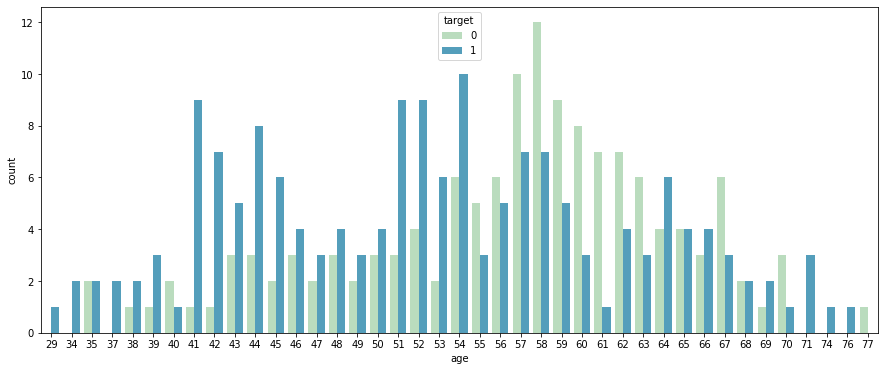

In [ ]:
# Plots age and target for 1 0. We see that as age increases so does heart disease
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

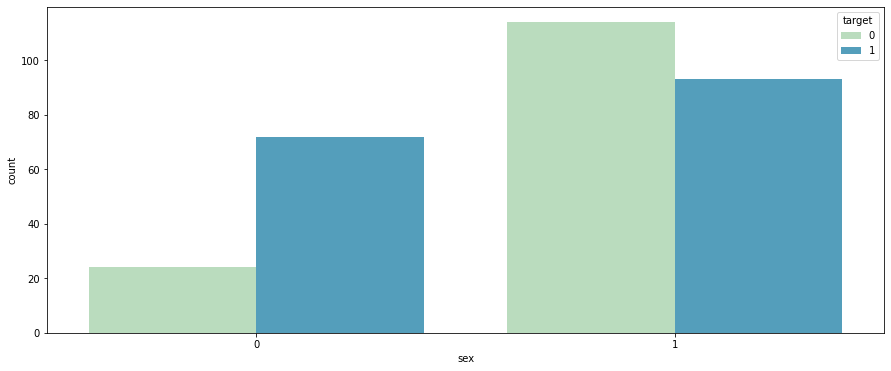

In [ ]:
# We see heart disease is more common among males than females
plt.figure(figsize=(15,6))
sns.countplot(x='sex',data = df, hue = 'target',palette='GnBu')
plt.show()

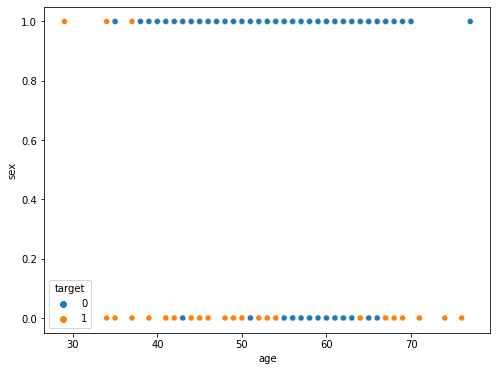

In [ ]:
# As age increases so does heart disease
# We then plot age and sex over all target classes.
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='sex',data=df,hue='target')
plt.show()

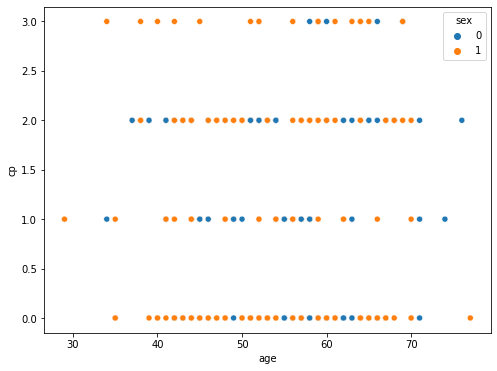

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='cp',data=df,hue='sex')
plt.show()

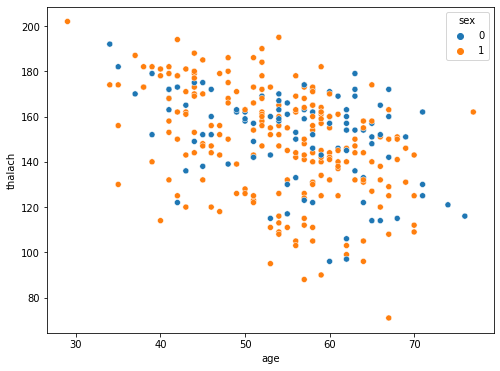

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='thalach',data=df,hue='sex')
plt.show()

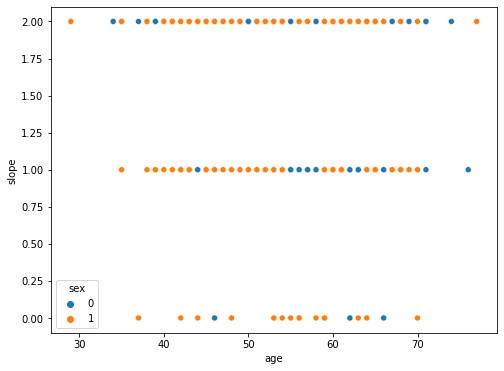

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='slope',data=df,hue='sex')
plt.show()

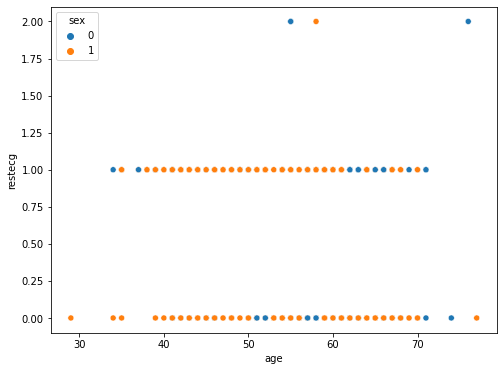

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='restecg',data=df,hue='sex')
plt.show()

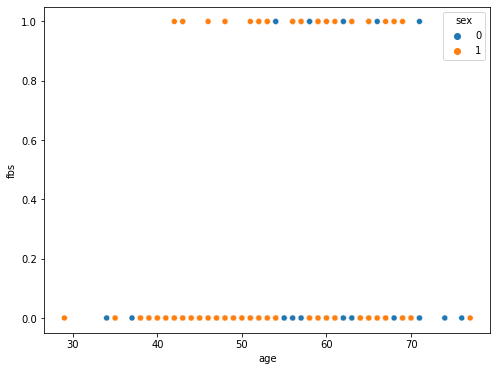

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='fbs',data=df,hue='sex')
plt.show()

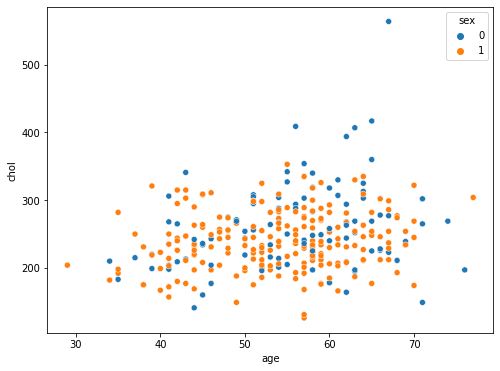

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='chol',data=df,hue='sex')
plt.show()

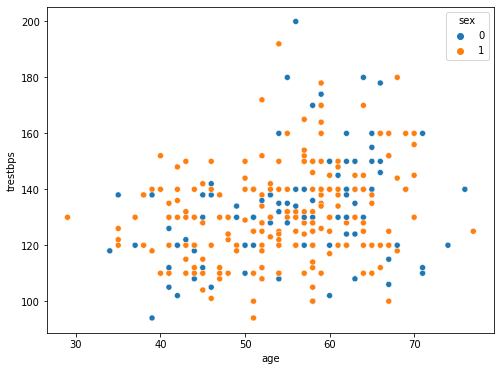

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='trestbps',data=df,hue='sex')
plt.show()

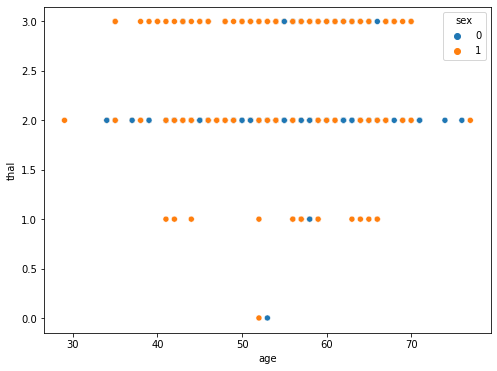

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='thal',data=df,hue='sex')
plt.show()

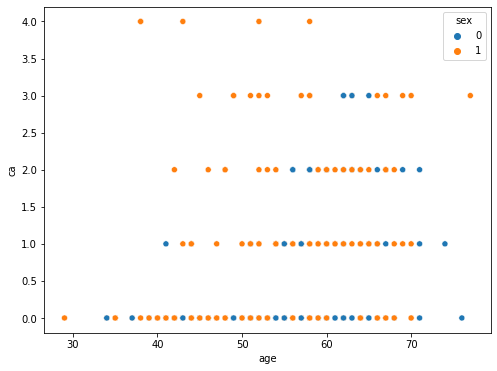

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='ca',data=df,hue='sex')
plt.show()

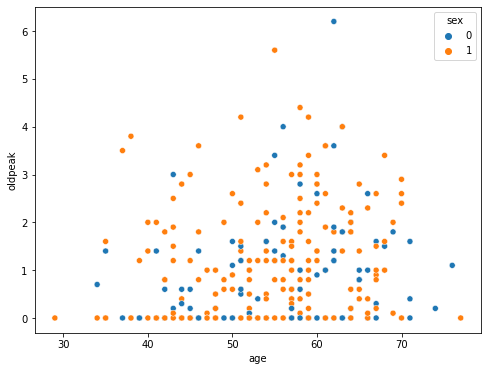

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='oldpeak',data=df,hue='sex')
plt.show()

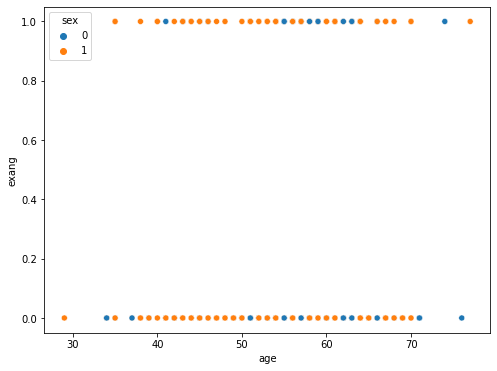

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='exang',data=df,hue='sex')
plt.show()

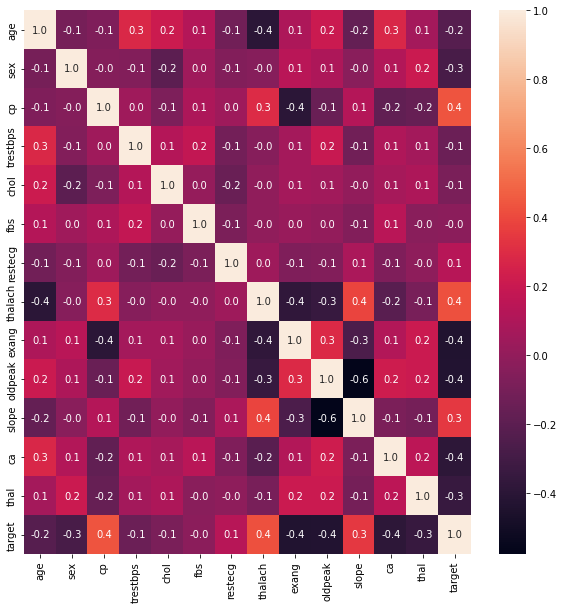

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
# Correlation matrix, we see chest pain is most common 
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [ ]:
# Create test and training data using 80-20 rule
from sklearn.model_selection import train_test_split

x = df
y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [ ]:
# Create logistic regression model using train data.
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', 
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, 
                        n_jobs=5, 
                        tol=0.01
                         )

lr_classifier.fit(X_train, Y_train)

lr_classifier.classes_

convergence after 20 epochs took 0 seconds


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 1])

In [ ]:
# Calculate training and testing scores and print them out
score1 = round(lr_classifier.score(X_train, Y_train), 2) 
score2 = round(lr_classifier.score(X_test, Y_test), 2)   

print ("Training and Testing scores: %.2f, %.2f" %  (score1, score2))

Training and Testing scores: 0.70, 0.69


In [ ]:
# Create confusion matrix from logestic regression model
from sklearn.metrics import confusion_matrix, classification_report

lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

lr_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

lr_cr = classification_report(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

pd.DataFrame(lr_cm, index=labels, columns=labels)

,0,1
0,15,12
1,7,27


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


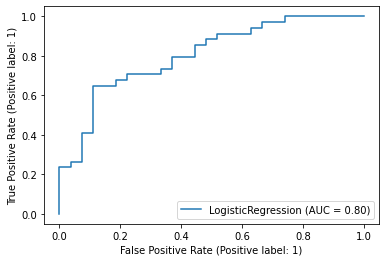

In [ ]:
# Plots roc curve
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(lr_classifier, X_test, Y_test, ax=ax)

plt.show()

In [ ]:
# SGD classifier
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, 
                        tol=1e-3, 
                        random_state=42,
                        n_jobs=5, 
                        )

sgd_classifier.fit(X_train, Y_train)

SGDClassifier(n_jobs=5, random_state=42)

In [ ]:
# Calculates training and testing scores
score3 = round(sgd_classifier.score(X_train, Y_train), 2) 
score4 = round(sgd_classifier.score(X_test, Y_test), 2)   

print ("Training and Testing scores: %.2f, %.2f" %  (score3, score4))

Training and Testing scores: 0.55, 0.56


In [ ]:
# Plots confusion matrix of model
sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

sgd_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

sgd_cr = classification_report(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels, zero_division=1)

pd.DataFrame(sgd_cm, index=labels, columns=labels)

,0,1
0,0,27
1,0,34


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


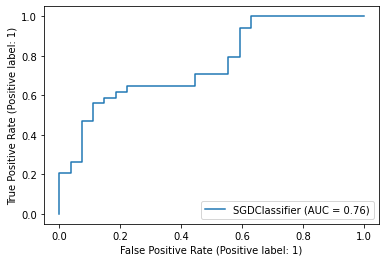

In [ ]:
# Plots roc curve from model
ax = plt.gca()
rfc_disp = plot_roc_curve(sgd_classifier, X_test, Y_test, ax=ax)

plt.show()

In [ ]:
# Random forest classifier model
from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier(n_estimators=100,
                                       n_jobs=5)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=5)

In [ ]:
# Calculate training and testing scores
score5 = round(rf_classifier.score(X_train, Y_train), 2)
score6 = round(rf_classifier.score(X_test, Y_test), 2)  

print ("Training and Testing scores: %.2f, %.2f" %  (score1, score2))

Training and Testing scores: 0.70, 0.69


In [ ]:
# creates confusion matrix then plots it
rf_predictions = rf_classifier.predict(X_test)

labels =rf_classifier.classes_

rf_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

rf_cr = classification_report(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels, zero_division=1)

pd.DataFrame(rf_cm, index=labels, columns=labels)

,0,1
0,0,27
1,0,34


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


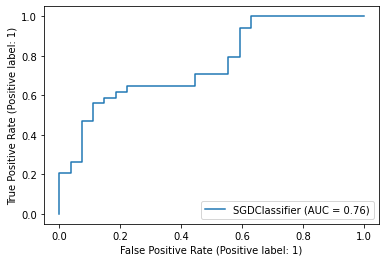

In [ ]:
# Plots roc curve
ax = plt.gca()
rfc_disp = plot_roc_curve(sgd_classifier, X_test, Y_test, ax=ax)

plt.show()

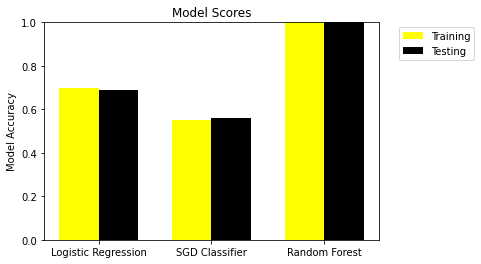

In [ ]:
# Plots each models training and testing scores
labels = ['Logistic Regression', 'SGD Classifier', 'Random Forest']
training_scores = [score1, score3, score5]
testing_scores =  [score2, score4, score6]

x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='yellow')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='black')

ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Scores')
plt.show()

In [ ]:
# Scale data then repeat last steps with new scaled data and compare differences. 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)

scaled_df = scaler.transform(df)

scaled_df

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -0.71442887,
        -2.14887271,  0.91452919],
       [-1.91531289,  0.68100522,  1.00257707, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [-1.47415758, -1.46841752,  0.03203122, ..., -0.71442887,
        -0.51292188,  0.91452919],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.29046364,  0.68100522, -0.93851463, ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 0.29046364, -1.46841752,  0.03203122, ...,  0.26508221,
        -0.51292188, -1.09345881]])

In [ ]:
from sklearn.model_selection import train_test_split

x = scaled_df
y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', 
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, 
                        n_jobs=5, 
                        tol=0.01
                         )

lr_classifier.fit(X_train, Y_train)

lr_classifier.classes_

convergence after 20 epochs took 0 seconds


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.0s finished


array([0, 1])

In [ ]:
score7 = round(lr_classifier.score(X_train, Y_train), 2) 
score8 = round(lr_classifier.score(X_test, Y_test), 2)   

print ("Training and Testing scores: %.2f, %.2f" %  (score7, score8))

Training and Testing scores: 1.00, 1.00


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

lr_predictions = lr_classifier.predict(X_test)

labels = lr_classifier.classes_

lr_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

lr_cr = classification_report(y_true=Y_test, 
                      y_pred = lr_predictions, 
                      labels = labels)

pd.DataFrame(lr_cm, index=labels, columns=labels)

,0,1
0,27,0
1,0,34


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


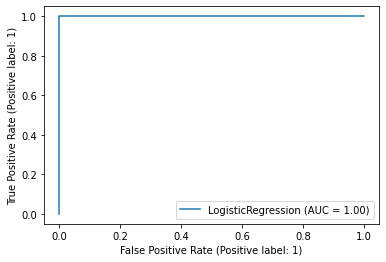

In [ ]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(lr_classifier, X_test, Y_test, ax=ax)

plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(max_iter=1000, 
                        tol=1e-3, 
                        random_state=42,
                        n_jobs=5, 
                        )

sgd_classifier.fit(X_train, Y_train)

SGDClassifier(n_jobs=5, random_state=42)

In [ ]:
score9 = round(sgd_classifier.score(X_train, Y_train), 2) 
score10 = round(sgd_classifier.score(X_test, Y_test), 2)   

print ("Training and Testing scores: %.2f, %.2f" %  (score9, score10))

Training and Testing scores: 1.00, 1.00


In [ ]:
sgd_predictions = sgd_classifier.predict(X_test)

labels = sgd_classifier.classes_

sgd_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

sgd_cr = classification_report(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels, zero_division=1)

pd.DataFrame(sgd_cm, index=labels, columns=labels)

,0,1
0,27,0
1,0,34


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


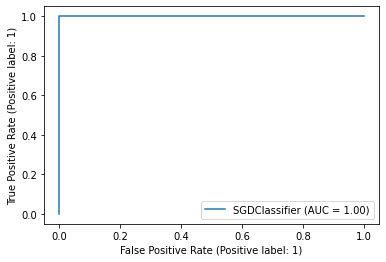

In [ ]:
ax = plt.gca()
rfc_disp = plot_roc_curve(sgd_classifier, X_test, Y_test, ax=ax)

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rf_classifier = RandomForestClassifier(n_estimators=100,
                                       n_jobs=5)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=5)

In [ ]:
score11 = round(rf_classifier.score(X_train, Y_train), 2)
score12= round(rf_classifier.score(X_test, Y_test), 2)  

print ("Training and Testing scores: %.2f, %.2f" %  (score11, score12))

Training and Testing scores: 1.00, 1.00


In [ ]:
rf_predictions = rf_classifier.predict(X_test)

labels =rf_classifier.classes_

rf_cm = confusion_matrix(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels)

rf_cr = classification_report(y_true=Y_test, 
                      y_pred = sgd_predictions, 
                      labels = labels, zero_division=1)

pd.DataFrame(rf_cm, index=labels, columns=labels)

,0,1
0,27,0
1,0,34


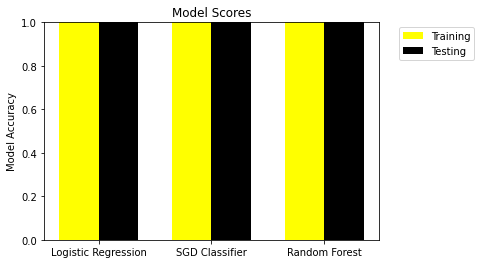

In [ ]:
labels = ['Logistic Regression', 'SGD Classifier', 'Random Forest']
training_scores = [score7, score8, score9]
testing_scores =  [score10, score11, score12]

x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='yellow')
rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='black')

ax.set_ylabel('Model Accuracy')
ax.set_xticks(x)
ax.set_ylim(0,1)
ax.set_xticklabels(labels)
ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

plt.title('Model Scores')
plt.show()

We can see that after scaling the data we see a dramtic difference in testing and training scores. The scores are perfect after scaling the data. Before scaling the data the random forest was the only perfect model. 

In Conclusion we can learn a lot from the data and the models. The first most important point is that cheat pain is the most correlated with heart disease. Excerise is the most negatively correlated, meaning the more you excersie the less chance you have for heart disease. 